In [99]:
# Modules
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Enables automatic black formatting when executing cells
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [91]:
# The model's difference equation/map + probabilities
def sir_map(S, R, I, N, beta, gamma, pi_a, s_0):

    # Eq 1
    S_prime = S + -beta * I * (S / N)

    # Eq 2
    R_prime = R + gamma * I

    # Eq 3
    I_prime = I + beta * I * (S / N) - gamma * I

    PrI_prime = I_prime / N
    PrS_prime = S_prime / N
    PrR_prime = R_prime / N

    # Eq 5
    PrSy_prime = (1 - pi_a) * PrI_prime + s_0 * (PrS_prime + PrR_prime)

    # Eq 4
    PrIgSy_prime = (1 - pi_a) * (PrI_prime / PrSy_prime)

    return S_prime, R_prime, I_prime, PrIgSy_prime, PrSy_prime

In [92]:
def simulator(n_weeks, S_0, R_0, I_0, N, beta, gamma, pi_a, s_0):

    PrI_0 = I_0 / N
    PrS_0 = S_0 / N
    PrSy_0 = (1 - pi_a) * PrI_0 + s_0 * PrS_0
    PrIgSy_0 = (1 - pi_a) * (PrI_0 / PrSy_0)

    series = {}
    series["S"] = [S_0]
    series["R"] = [R_0]
    series["I"] = [I_0]
    series["PrIgSy"] = [PrIgSy_0]
    series["PrSy"] = [PrSy_0]

    for nn in range(0, n_weeks):

        S, R, I, PrIgSy, PrSy = sir_map(
            series["S"][nn], series["R"][nn], series["I"][nn], N, beta, gamma, pi_a, s_0
        )
        series["S"].append(S)
        series["R"].append(R)
        series["I"].append(I)
        series["PrIgSy"].append(PrIgSy)
        series["PrSy"].append(PrSy)

    return series

In [93]:
# Calibration
gamma = 0.5
s_0 = 0.02
N = 327200000
pi_a = 0.30

I_start = 50
R_start = 0
S_start = N - I_start - R_start

In [114]:
# Finding the current beta in the US

beta_grid = np.linspace(1, 4, num=1000)

for beta in beta_grid:

    simulation_outcomes = simulator(
        10, S_start, R_start, I_start, N, beta, gamma, pi_a, s_0
    )

    if abs(simulation_outcomes["PrIgSy"][10] - 0.1) < 0.001:

        print(f"Beta found at {beta:.2f}")
        break

Beta found at 2.20


In [ ]:
# Some plots

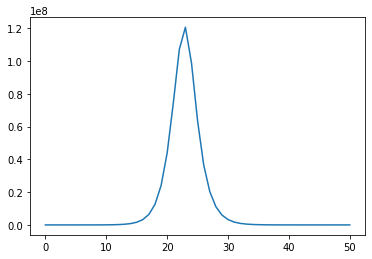

In [95]:
plt.plot(simulation_outcomes["I"])

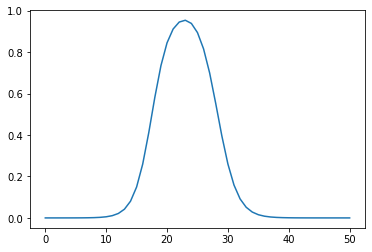

In [96]:
plt.plot(simulation_outcomes["PrIgSy"])